In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importing the pre processed data and assigning the target feature
df = pd.read_csv('modifiedDatasets/preprocessed.csv')
predictors = [x for x in df.columns if x != 'label']
target = ['label']

# Splitting the dataset into a training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_test = test[predictors]
y_test = test[target]

In [3]:
def kNN_algo(n_neighbours=5):
    # Splitting the training set up using k-fold cross validation to reduce stochasticity of model performance 
    kf_CV = KFold(n_splits=10, shuffle=True, random_state=42)
    results = []

    for train_idx, validate_idx in kf_CV.split(train):
        X_train, X_val = train[predictors].iloc[train_idx], train[predictors].iloc[validate_idx]
        y_train, y_val = train[target].iloc[train_idx], train[target].iloc[validate_idx]

        # Performing kNN analysis on the training dataset
        # Preprocessing
        # 1. Standardise the data
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

        # 2. Training
        knn = KNN(n_neighbors=n_neighbours)
        knn.fit(X_train, y_train.values.ravel()) 

        # 3. Predictions
        y_pred = knn.predict(X_val)
        results.append(accuracy_score(y_val, y_pred))

    return np.mean(results)

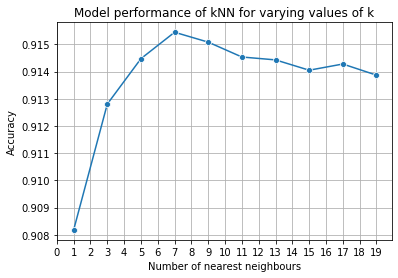

In [4]:
# Determining the best value for k in the kNN algorithm and producing a plot against accuracy
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
scores = []
best_k = 0

for val in k:
    acc = kNN_algo(val)
    scores.append(acc)

plt.title("Model performance of kNN for varying values of k")
plt.xlabel("Number of nearest neighbours")
plt.ylabel("Accuracy")
graph = sns.lineplot(x=k, y=scores, marker="o")
graph.set_xticks(range(k[-1]+1))
x_axis_labels = list(map(str, range(0, k[-1]+1)))
graph.set_xticklabels(x_axis_labels)
plt.grid()
plt.savefig('images/kNN Best K.png')
plt.show()
plt.close()